In [288]:
import sys
!{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt


In [289]:
import math

# get largest solution
# given: a and b are positive and c is negitive
def solve_quadratic(a, b, c):
  disc = b**2 - 4*a*c
  assert disc >= 0
  
  x = (-b + math.sqrt(disc)) / (2*a)
  assert x >= 0
  return x

# description:
  # no-turn and no-lane-change intersection with traffic light
# assume:
  # infinite cars in queue
  # "through" := car breaking the stop line's plane
  # no variance (all drivers act perfectly average)
def throughput_basic(speed_lim, t_green, t_yellow, car_len, stop_spacing, go_threshold, acc):
  # time
  t_total = t_green + t_yellow
  t_to_speed_limit = speed_lim / acc
  t_acc = min(t_to_speed_limit, t_total)
  t_limit = t_total - t_acc
  
  # distance
  d_car = stop_spacing + car_len
  d_acc = (0.5 * acc * t_acc**2)
  d_limit = speed_lim * t_limit

  if stop_spacing > go_threshold:
    # enough space to accelerate immediately
    # solved in distance
    return math.ceil((d_acc + d_limit) / d_car)
  else:
    # must wait to accelerate
    # solved in time
    d_to_go_threshold = go_threshold - stop_spacing
    # this assumes:
      # i * d_car > d_acc > d_to_go_threshold
      # this is reasonable under realistic considerations
    num = t_total + (d_acc / speed_lim) - t_acc
    den = math.sqrt(2 * d_to_go_threshold / acc) + d_car / speed_lim
    return math.ceil(num / den)

    # if d_acc > d_to_go_threshold:
    #   if distance traveled by last car is < d_acc:
    #     a = 2 * d_to_go_threshold / acc
    #     b = 2 * d_car / acc
    #     c = -1 * (t_total ** 2)
    #     return math.ceil(solve_quadratic(a, b, c))
    #   else:
    #     num = t_total + (d_acc / speed_lim) - t_acc
    #     den = math.sqrt(2 * d_to_go_threshold / acc) + d_car / speed_lim
    #     return math.ceil(num / den)
    # else: 
    #   if distance traveled by last car is < d_acc:
    #     a = (t_acc + (d_to_go_threshold - d_acc) / speed_lim) ** 2
    #     b = 2 * d_car / acc
    #     c = -1 * (t_total ** 2)
    #     return math.ceil(solve_quadratic(a, b, c))
    #   else:
    #     print("hit")
    #     num = t_total + (d_acc / speed_lim) - t_acc
    #     den = t_acc + (d_to_go_threshold - d_acc + d_car) / speed_lim
    #     return math.ceil(num / den)


In [290]:
def meters_to_feet(meters):
    return meters * 3.28084

def feet_to_meters(feet):
    return feet / 3.28084

def mps_to_mph(mps):
    return mps * 2.23694

def mph_to_mps(mph):
    return mph / 2.23694


In [ ]:
speed_limit = 25                # mph
green_time = 30                 # s
yellow_time_multiple = 0.1      # s/mph
car_length = 16                 # ft
acceleration = 2                # m/s^2

# stopped_car_spacing = 8         # ft
# go_threshold = 20               # ft
# throughput_basic(mph_to_mps(speed_limit), green_time, speed_limit * yellow_time_multiple, feet_to_meters(car_length), feet_to_meters(stopped_car_spacing), feet_to_meters(go_threshold), acceleration)

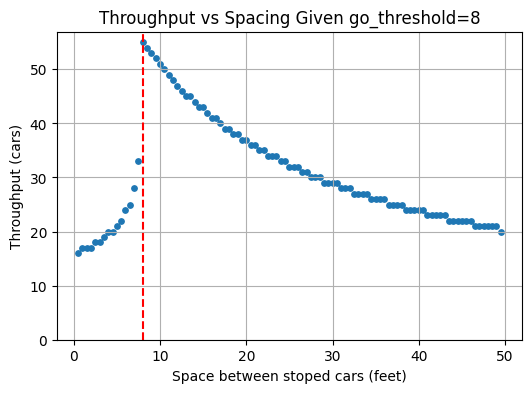

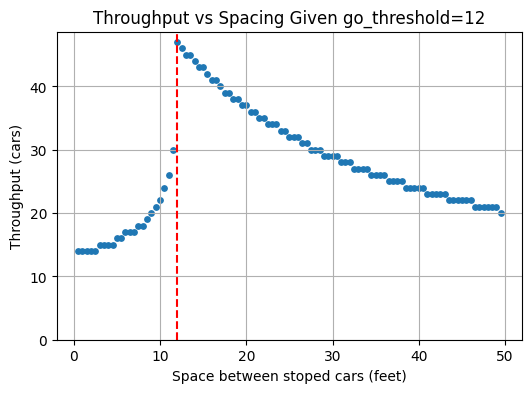

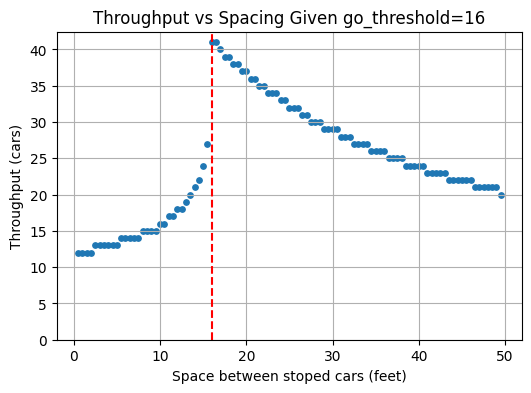

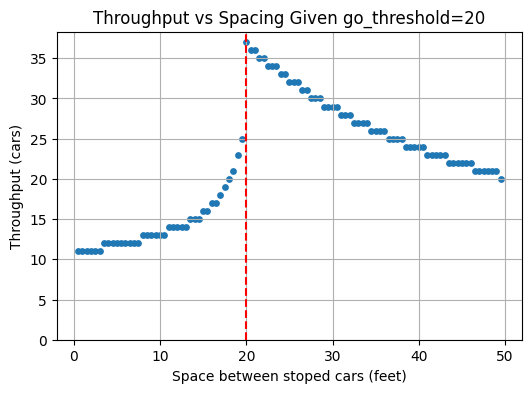

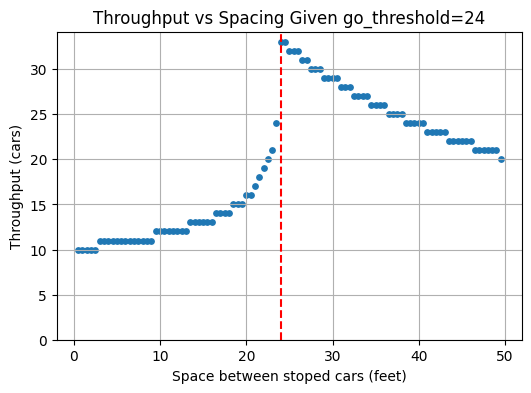

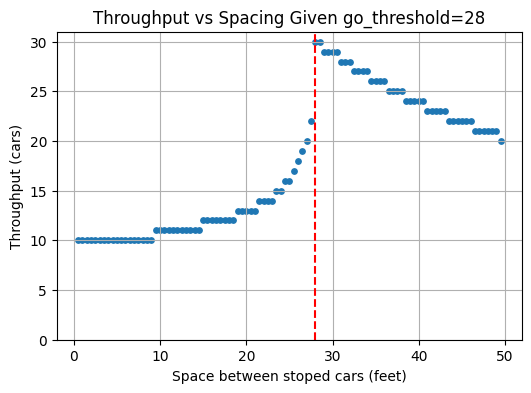

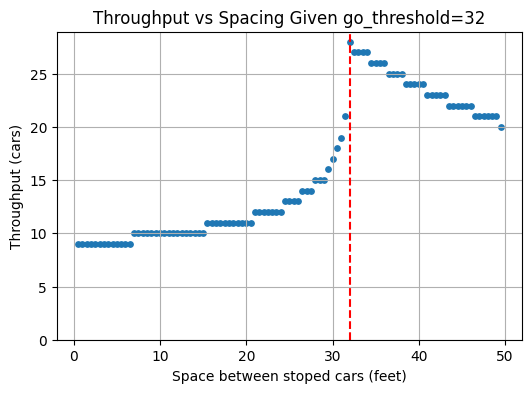

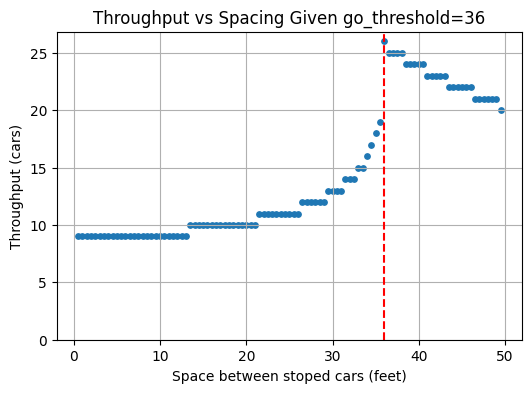

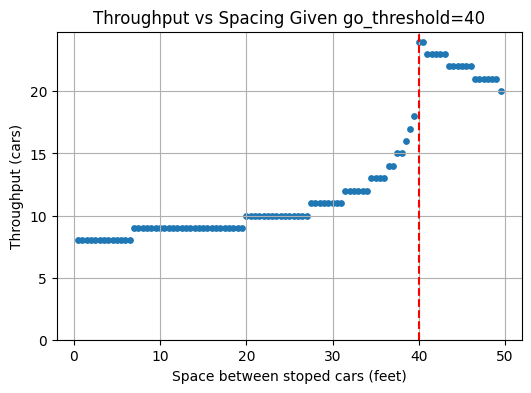

In [295]:
partial_throughput = lambda go_thresh, spacing: throughput_basic(mph_to_mps(speed_limit), green_time, speed_limit * yellow_time_multiple, feet_to_meters(car_length), feet_to_meters(spacing), feet_to_meters(go_thresh), acceleration)

go_thresholds = range(8, 41, 4)
stopped_spacings = [x / 2 for x in range(1, 100)]

for thresh in go_thresholds:
    spacing_throughput = lambda space : partial_throughput (thresh, space)
    throughput = list(map(spacing_throughput, stopped_spacings))

    plt.figure(figsize=(6, 4))
    plt.scatter(stopped_spacings, throughput, s=15)
    plt.axvline(x=thresh, color='red', linestyle='--', label='go threshold')

    plt.ylim(bottom=0)

    plt.xlabel("Space between stoped cars (feet)")
    plt.ylabel("Throughput (cars)")
    plt.title(f'Throughput vs Spacing Given go_threshold={thresh}')
    plt.grid(True)
    plt.show()
